In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df = pd.read_csv('data/raw_data.csv')

## Data cleaning

### Remove Null Price rows and change type to float

In [13]:
df = df[pd.to_numeric(df['Price'], errors='coerce').notnull()]

In [14]:
df = df.astype({"Price": float}, errors='raise')

### Remove duplicate ID

In [15]:
df['Immoweb ID'].value_counts()

9691876    4
9662650    3
9597143    3
8237073    3
9687272    3
          ..
9623733    1
9245768    1
9606238    1
9695276    1
7921699    1
Name: Immoweb ID, Length: 13893, dtype: int64

In [16]:
df = df.drop_duplicates(['Immoweb ID'], keep='last')
df['Immoweb ID'].value_counts()

9729720    1
9678715    1
9697071    1
9557609    1
9678634    1
          ..
9518030    1
9622950    1
9478102    1
9620790    1
7921699    1
Name: Immoweb ID, Length: 13893, dtype: int64

### Remove subtype 

In [17]:
df = df[df['property sub-type'] != "APARTMENT_BLOCK"]
df['property sub-type'].value_counts()

VILLA                   2468
GROUND_FLOOR            1606
DUPLEX                  1580
MIXED_USE_BUILDING      1240
PENTHOUSE               1170
FLAT_STUDIO              873
EXCEPTIONAL_PROPERTY     566
SERVICE_FLAT             500
MANSION                  479
TOWN_HOUSE               383
COUNTRY_COTTAGE          292
LOFT                     271
BUNGALOW                 212
FARMHOUSE                171
TRIPLEX                   99
KOT                       95
CHALET                    94
MANOR_HOUSE               62
CASTLE                    50
Name: property sub-type, dtype: int64

### Building condition

In [18]:
df['Building condition'].value_counts()
df['Building condition'].unique()

array(['Good', nan, 'As new', 'To renovate', 'To be done up',
       'Just renovated', 'To restore'], dtype=object)

In [19]:
building_condition_map = {'As new': 6, 'Just renovated': 5, 'Good': 4, 'To be done up': 3, 'To renovate':2, 'To restore':1}
df = df.applymap(lambda s: building_condition_map.get(s) if s in building_condition_map else s)

In [20]:
df['Building condition'].isnull().sum()    #isnull() detecting missing value

3828

In [21]:
df['Building condition'] = df['Building condition'].fillna(2)
df['Building condition'].isnull().sum()

0

### Property type & Post code

In [22]:
df.drop(columns=['Post code'])

,Immoweb ID,Property type,property sub-type,Price,Building condition,Kitchen type,Bedrooms,Furnished,Terrace surface,Tenement building,Number of frontages,Swimming pool,How many fireplaces?,Garden,Terrace,Surface of the plot,Living area,Garden surface,Garden orientation
0,9729720,APARTMENT,PENTHOUSE,179000.0,4.0,Semi equipped,1.0,Yes,9.0,No,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN
1,9729785,APARTMENT,PENTHOUSE,255000.0,4.0,Installed,1.0,Yes,46.0,No,2.0,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN
2,9729784,APARTMENT,PENTHOUSE,255000.0,4.0,Installed,1.0,Yes,46.0,No,2.0,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN
3,9729780,APARTMENT,PENTHOUSE,620000.0,4.0,Installed,3.0,Yes,70.0,No,2.0,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN
4,9727201,APARTMENT,PENTHOUSE,379000.0,4.0,USA hyper equipped,2.0,No,110.0,No,3.0,No,NaN,NaN,NaN,NaN,120.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,7770552,APARTMENT,SERVICE_FLAT,132000.0,6.0,NaN,1.0,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14537,7770553,APARTMENT,SERVICE_FLAT,177000.0,6.0,NaN,1.0,NaN,NaN,No,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
14538,7770551,APARTMENT,SERVICE_FLAT,190000.0,6.0,NaN,2.0,NaN,NaN,No,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
14539,7921693,APARTMENT,SERVICE_FLAT,1350000.0,2.0,NaN,30.0,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN


### Kitchen type	


In [23]:
Kit_type_dict = {"USA uninstalled" : 0, 
                 "Not installed" : 0, 
                 "Installed": 1, 
                 "USA installed": 1,
                 "Semi equipped": 1,
                 "USA semi equipped": 1,
                 "Hyper equipped": 2,
                 "USA hyper equipped": 2
                }

df = df.replace(Kit_type_dict)
df["Kitchen type"] = df["Kitchen type"].fillna(0)


df

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Terrace surface,Tenement building,Number of frontages,Swimming pool,How many fireplaces?,Garden,Terrace,Surface of the plot,Living area,Garden surface,Garden orientation
0,9729720,APARTMENT,PENTHOUSE,179000.0,1140,4.0,1.0,1.0,Yes,9.0,No,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN
1,9729785,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1.0,Yes,46.0,No,2.0,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN
2,9729784,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1.0,Yes,46.0,No,2.0,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN
3,9729780,APARTMENT,PENTHOUSE,620000.0,8370,4.0,1.0,3.0,Yes,70.0,No,2.0,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN
4,9727201,APARTMENT,PENTHOUSE,379000.0,1020,4.0,2.0,2.0,No,110.0,No,3.0,No,NaN,NaN,NaN,NaN,120.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,7770552,APARTMENT,SERVICE_FLAT,132000.0,1730,6.0,0.0,1.0,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14537,7770553,APARTMENT,SERVICE_FLAT,177000.0,1730,6.0,0.0,1.0,NaN,NaN,No,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
14538,7770551,APARTMENT,SERVICE_FLAT,190000.0,1730,6.0,0.0,2.0,NaN,NaN,No,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
14539,7921693,APARTMENT,SERVICE_FLAT,1350000.0,5600,2.0,0.0,30.0,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN


### Furnished


In [24]:
df['Furnished'].unique()

array(['Yes', 'No', nan], dtype=object)

In [25]:
df['Furnished'].isnull().sum()


4080

#### fill No to missing value then map to 1,0

In [26]:
df['Furnished'] = df['Furnished'].fillna(0)
df['Furnished'] = df['Furnished'].apply(lambda v: 0 if v == 0 else 1)

#### double check if value is 1, 0 and no missing value

In [27]:
print(df['Furnished'].unique())
print(df['Furnished'].isna().sum())

[1 0]
0


### Bedrooms


In [28]:
# Fill missing values with 2 bedrooms
df['Bedrooms'] = df['Bedrooms'].fillna(2).astype(int)

df["Bedrooms"].value_counts()

2      4389
3      2929
4      1723
1      1350
5       909
6       429
7       144
8       126
10       61
9        49
12       21
11       20
14       11
13        8
18        7
16        5
17        5
15        5
30        4
25        3
23        3
50        2
60        1
204       1
20        1
22        1
28        1
27        1
35        1
24        1
Name: Bedrooms, dtype: int64

### Terrace surface + Terrace	


#### Combine terrace & terrace surface in yes and no

In [29]:
df['Terrace_Combined'] = np.where(df['Terrace surface'].isnull() & df['Terrace'].isnull(), 'No', 'Yes')

#### Transform Terrace_Combined to 0 & 1

In [30]:
terrace = ['No', 'Yes']

ordenc = OrdinalEncoder(categories=[terrace])

df[["Terrace_Combined"]] = ordenc.fit_transform(df[["Terrace_Combined"]])

df

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Terrace surface,...,Number of frontages,Swimming pool,How many fireplaces?,Garden,Terrace,Surface of the plot,Living area,Garden surface,Garden orientation,Terrace_Combined
0,9729720,APARTMENT,PENTHOUSE,179000.0,1140,4.0,1.0,1,1,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,1.0
1,9729785,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,46.0,...,2.0,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,1.0
2,9729784,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,46.0,...,2.0,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,1.0
3,9729780,APARTMENT,PENTHOUSE,620000.0,8370,4.0,1.0,3,1,70.0,...,2.0,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN,1.0
4,9727201,APARTMENT,PENTHOUSE,379000.0,1020,4.0,2.0,2,1,110.0,...,3.0,No,NaN,NaN,NaN,NaN,120.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,7770552,APARTMENT,SERVICE_FLAT,132000.0,1730,6.0,0.0,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
14537,7770553,APARTMENT,SERVICE_FLAT,177000.0,1730,6.0,0.0,1,0,NaN,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,1.0
14538,7770551,APARTMENT,SERVICE_FLAT,190000.0,1730,6.0,0.0,2,0,NaN,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,1.0
14539,7921693,APARTMENT,SERVICE_FLAT,1350000.0,5600,2.0,0.0,30,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN,0.0


#### Drop Terrace and Terrace Surface columns

In [31]:
df = df.drop(columns =['Terrace', 'Terrace surface'])

df

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Tenement building,Number of frontages,Swimming pool,How many fireplaces?,Garden,Surface of the plot,Living area,Garden surface,Garden orientation,Terrace_Combined
0,9729720,APARTMENT,PENTHOUSE,179000.0,1140,4.0,1.0,1,1,No,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,1.0
1,9729785,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,No,2.0,NaN,NaN,NaN,NaN,42.0,NaN,NaN,1.0
2,9729784,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,No,2.0,NaN,NaN,NaN,NaN,42.0,NaN,NaN,1.0
3,9729780,APARTMENT,PENTHOUSE,620000.0,8370,4.0,1.0,3,1,No,2.0,NaN,NaN,NaN,NaN,150.0,NaN,NaN,1.0
4,9727201,APARTMENT,PENTHOUSE,379000.0,1020,4.0,2.0,2,1,No,3.0,No,NaN,NaN,NaN,120.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,7770552,APARTMENT,SERVICE_FLAT,132000.0,1730,6.0,0.0,1,0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
14537,7770553,APARTMENT,SERVICE_FLAT,177000.0,1730,6.0,0.0,1,0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
14538,7770551,APARTMENT,SERVICE_FLAT,190000.0,1730,6.0,0.0,2,0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
14539,7921693,APARTMENT,SERVICE_FLAT,1350000.0,5600,2.0,0.0,30,0,No,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN,0.0


### ~~Tenement building	~~


In [32]:
df = df.drop(columns =['Tenement building'])

df

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,How many fireplaces?,Garden,Surface of the plot,Living area,Garden surface,Garden orientation,Terrace_Combined
0,9729720,APARTMENT,PENTHOUSE,179000.0,1140,4.0,1.0,1,1,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,1.0
1,9729785,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,2.0,NaN,NaN,NaN,NaN,42.0,NaN,NaN,1.0
2,9729784,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,2.0,NaN,NaN,NaN,NaN,42.0,NaN,NaN,1.0
3,9729780,APARTMENT,PENTHOUSE,620000.0,8370,4.0,1.0,3,1,2.0,NaN,NaN,NaN,NaN,150.0,NaN,NaN,1.0
4,9727201,APARTMENT,PENTHOUSE,379000.0,1020,4.0,2.0,2,1,3.0,No,NaN,NaN,NaN,120.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,7770552,APARTMENT,SERVICE_FLAT,132000.0,1730,6.0,0.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
14537,7770553,APARTMENT,SERVICE_FLAT,177000.0,1730,6.0,0.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
14538,7770551,APARTMENT,SERVICE_FLAT,190000.0,1730,6.0,0.0,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
14539,7921693,APARTMENT,SERVICE_FLAT,1350000.0,5600,2.0,0.0,30,0,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN,0.0


### Swimming pool	


In [33]:
# Fill missing values with value 0
df['Swimming pool'].fillna(0, inplace = True)
df['Swimming pool'] = df['Swimming pool'].apply(lambda v: 0 if v == "No" else 1)
df['Swimming pool'].isnull().sum()

0

In [34]:
df['Swimming pool'].unique()

array([1, 0], dtype=int64)

### Garden + Garden surface	


In [35]:
print(df['Garden'].isna().sum())
print(df['Garden'].unique())

11051
[nan 'Yes']


In [36]:
df.loc[df['Garden surface'].isna()]

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,How many fireplaces?,Garden,Surface of the plot,Living area,Garden surface,Garden orientation,Terrace_Combined
0,9729720,APARTMENT,PENTHOUSE,179000.0,1140,4.0,1.0,1,1,NaN,1,NaN,NaN,NaN,63.0,NaN,NaN,1.0
1,9729785,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,2.0,1,NaN,NaN,NaN,42.0,NaN,NaN,1.0
2,9729784,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,2.0,1,NaN,NaN,NaN,42.0,NaN,NaN,1.0
3,9729780,APARTMENT,PENTHOUSE,620000.0,8370,4.0,1.0,3,1,2.0,1,NaN,NaN,NaN,150.0,NaN,NaN,1.0
4,9727201,APARTMENT,PENTHOUSE,379000.0,1020,4.0,2.0,2,1,3.0,0,NaN,NaN,NaN,120.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,7770552,APARTMENT,SERVICE_FLAT,132000.0,1730,6.0,0.0,1,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0
14537,7770553,APARTMENT,SERVICE_FLAT,177000.0,1730,6.0,0.0,1,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0
14538,7770551,APARTMENT,SERVICE_FLAT,190000.0,1730,6.0,0.0,2,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0
14539,7921693,APARTMENT,SERVICE_FLAT,1350000.0,5600,2.0,0.0,30,0,NaN,1,NaN,NaN,NaN,1500.0,NaN,NaN,0.0


#### Combine ['Garden'] and ['Garden surface] as ['garden_label] and map to 1,0

In [37]:
def categorise(col):  
    if col['Garden'] == "Yes" or col['Garden surface'] > 0:
        return 1
    return 0


df['garden_label'] = df.apply(lambda col: categorise(col), axis=1)

#### double check if value is 1, 0 and no missing value

In [38]:
df['garden_label'].unique()

array([0, 1], dtype=int64)

#### drop column Garden and Garden surface

In [39]:
df = df.drop(columns =['Garden', 'Garden surface'])

df

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,How many fireplaces?,Surface of the plot,Living area,Garden orientation,Terrace_Combined,garden_label
0,9729720,APARTMENT,PENTHOUSE,179000.0,1140,4.0,1.0,1,1,NaN,1,NaN,NaN,63.0,NaN,1.0,0
1,9729785,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,2.0,1,NaN,NaN,42.0,NaN,1.0,0
2,9729784,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,2.0,1,NaN,NaN,42.0,NaN,1.0,0
3,9729780,APARTMENT,PENTHOUSE,620000.0,8370,4.0,1.0,3,1,2.0,1,NaN,NaN,150.0,NaN,1.0,0
4,9727201,APARTMENT,PENTHOUSE,379000.0,1020,4.0,2.0,2,1,3.0,0,NaN,NaN,120.0,NaN,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,7770552,APARTMENT,SERVICE_FLAT,132000.0,1730,6.0,0.0,1,0,NaN,1,NaN,NaN,NaN,NaN,0.0,0
14537,7770553,APARTMENT,SERVICE_FLAT,177000.0,1730,6.0,0.0,1,0,NaN,1,NaN,NaN,NaN,NaN,1.0,0
14538,7770551,APARTMENT,SERVICE_FLAT,190000.0,1730,6.0,0.0,2,0,NaN,1,NaN,NaN,NaN,NaN,1.0,0
14539,7921693,APARTMENT,SERVICE_FLAT,1350000.0,5600,2.0,0.0,30,0,NaN,1,NaN,NaN,1500.0,NaN,0.0,0


### ~~Garden orientation~~


#### Drop garden orientation

In [40]:
df = df.drop(columns =['Garden orientation'])

df

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,How many fireplaces?,Surface of the plot,Living area,Terrace_Combined,garden_label
0,9729720,APARTMENT,PENTHOUSE,179000.0,1140,4.0,1.0,1,1,NaN,1,NaN,NaN,63.0,1.0,0
1,9729785,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,2.0,1,NaN,NaN,42.0,1.0,0
2,9729784,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,2.0,1,NaN,NaN,42.0,1.0,0
3,9729780,APARTMENT,PENTHOUSE,620000.0,8370,4.0,1.0,3,1,2.0,1,NaN,NaN,150.0,1.0,0
4,9727201,APARTMENT,PENTHOUSE,379000.0,1020,4.0,2.0,2,1,3.0,0,NaN,NaN,120.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,7770552,APARTMENT,SERVICE_FLAT,132000.0,1730,6.0,0.0,1,0,NaN,1,NaN,NaN,NaN,0.0,0
14537,7770553,APARTMENT,SERVICE_FLAT,177000.0,1730,6.0,0.0,1,0,NaN,1,NaN,NaN,NaN,1.0,0
14538,7770551,APARTMENT,SERVICE_FLAT,190000.0,1730,6.0,0.0,2,0,NaN,1,NaN,NaN,NaN,1.0,0
14539,7921693,APARTMENT,SERVICE_FLAT,1350000.0,5600,2.0,0.0,30,0,NaN,1,NaN,NaN,1500.0,0.0,0


### ~~How many fireplaces?	~~


#### Discard fireplaces

In [41]:
df = df.drop(columns =["How many fireplaces?"])

df

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Surface of the plot,Living area,Terrace_Combined,garden_label
0,9729720,APARTMENT,PENTHOUSE,179000.0,1140,4.0,1.0,1,1,NaN,1,NaN,63.0,1.0,0
1,9729785,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,2.0,1,NaN,42.0,1.0,0
2,9729784,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,2.0,1,NaN,42.0,1.0,0
3,9729780,APARTMENT,PENTHOUSE,620000.0,8370,4.0,1.0,3,1,2.0,1,NaN,150.0,1.0,0
4,9727201,APARTMENT,PENTHOUSE,379000.0,1020,4.0,2.0,2,1,3.0,0,NaN,120.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,7770552,APARTMENT,SERVICE_FLAT,132000.0,1730,6.0,0.0,1,0,NaN,1,NaN,NaN,0.0,0
14537,7770553,APARTMENT,SERVICE_FLAT,177000.0,1730,6.0,0.0,1,0,NaN,1,NaN,NaN,1.0,0
14538,7770551,APARTMENT,SERVICE_FLAT,190000.0,1730,6.0,0.0,2,0,NaN,1,NaN,NaN,1.0,0
14539,7921693,APARTMENT,SERVICE_FLAT,1350000.0,5600,2.0,0.0,30,0,NaN,1,NaN,1500.0,0.0,0


### Surface of the plot




In [42]:
# Fill empty values with 0
df['Surface of the plot'].fillna(0, inplace = True)

### Price per square metre

In [45]:
df['price/m2'] = (df['Price']/ df['Living area']).round(2)

df

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Surface of the plot,Living area,Terrace_Combined,garden_label,price/m2
0,9729720,APARTMENT,PENTHOUSE,179000.0,1140,4.0,1.0,1,1,NaN,1,0.0,63.0,1.0,0,2841.27
1,9729785,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,2.0,1,0.0,42.0,1.0,0,6071.43
2,9729784,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,2.0,1,0.0,42.0,1.0,0,6071.43
3,9729780,APARTMENT,PENTHOUSE,620000.0,8370,4.0,1.0,3,1,2.0,1,0.0,150.0,1.0,0,4133.33
4,9727201,APARTMENT,PENTHOUSE,379000.0,1020,4.0,2.0,2,1,3.0,0,0.0,120.0,1.0,0,3158.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,7770552,APARTMENT,SERVICE_FLAT,132000.0,1730,6.0,0.0,1,0,NaN,1,0.0,NaN,0.0,0,NaN
14537,7770553,APARTMENT,SERVICE_FLAT,177000.0,1730,6.0,0.0,1,0,NaN,1,0.0,NaN,1.0,0,NaN
14538,7770551,APARTMENT,SERVICE_FLAT,190000.0,1730,6.0,0.0,2,0,NaN,1,0.0,NaN,1.0,0,NaN
14539,7921693,APARTMENT,SERVICE_FLAT,1350000.0,5600,2.0,0.0,30,0,NaN,1,0.0,1500.0,0.0,0,900.00


In [46]:
# Test if there are null values in price/m2 column
df['price/m2'].isnull().sum()

2398

### Frontages

In [47]:
df['Number of frontages'].isnull().sum()

3927

In [48]:
#get ['number of frontages'] with values and calc mean
selected_rows = df[~df['Number of frontages'].isnull()]
mean_num_of_frontages = selected_rows['Number of frontages'].mean(axis=0).round(0)
mean_num_of_frontages

3.0

In [49]:
# fill mean value to missing value
df['Number of frontages'] = df['Number of frontages'].fillna(mean_num_of_frontages)
df['Number of frontages'].isnull().sum()

0

In [50]:
df['Number of frontages'] = df['Number of frontages'].astype(int)

In [51]:
# double check
df['Number of frontages'].value_counts()

3     5260
4     3504
2     3346
1       91
6        6
7        2
5        1
16       1
Name: Number of frontages, dtype: int64

### Final check missing value %




In [52]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Immoweb ID,Immoweb ID,0.000000
Property type,Property type,0.000000
property sub-type,property sub-type,0.000000
Price,Price,0.000000
Post code,Post code,0.000000
Building condition,Building condition,0.000000
Kitchen type,Kitchen type,0.000000
Bedrooms,Bedrooms,0.000000
Furnished,Furnished,0.000000
Number of frontages,Number of frontages,0.000000


In [10]:
# save dataframe 
df.to_csv('dataset_regression.csv', index=False)

### Most & Least Expensive Municipalities

### Belgium

#### Most expensive municipalities in Belgium based on average price

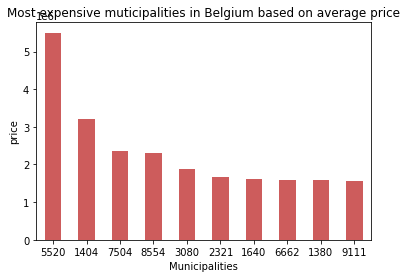

In [54]:
avg_price_be = df.groupby('Post_code_orig')['Price'].mean()

mep_average_price = avg_price_be.sort_values(ascending=False).head(10)

ax = mep_average_price.plot.bar(x='Price', y='Post_code_orig', rot=0, color=["IndianRed"]) 

 
ax.set_title('Most expensive muticipalities in Belgium based on average price')    
ax.set_xlabel('Municipalities')    
ax.set_ylabel('price')  
plt.xlabel('Municipalities')

plt.show()     

#### Most expensive municipalities in Belgium based on median price

Text(0.5, 0, 'Municipalities')

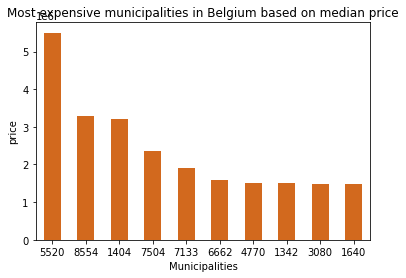

In [251]:
median_price_be = df.groupby('Post_code_orig')['Price'].median()

mep_median = median_price_be.sort_values(ascending=False).head(10)

ax = mep_median.plot.bar(x='Price', y='Post_code_orig', rot=0, color=["chocolate"])  
ax.set_title('Most expensive municipalities in Belgium based on median price')    
ax.set_xlabel('Municipalities')    
ax.set_ylabel('price')  
plt.xlabel('Municipalities')


#### Most expensive municipalities in Belgium based on price/m2

Text(0.5, 0, 'Municipalities')

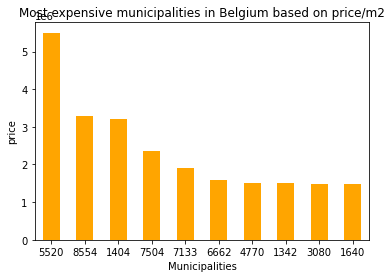

In [256]:
price_m2_be = df.groupby('Post_code_orig')['price/m2'].mean()

mep_price_m2 = price_m2_be.sort_values(ascending=False).head(10)

ax = mep_median.plot.bar(x='Price', y='Post_code_orig', rot=0, color=["orange"])  
ax.set_title('Most expensive municipalities in Belgium based on price/m2')    
ax.set_xlabel('Municipalities')    
ax.set_ylabel('price')  
plt.xlabel('Municipalities')

#### Least expensive municipalities in Belgium based on average price

Text(0.5, 0, 'Municipalities')

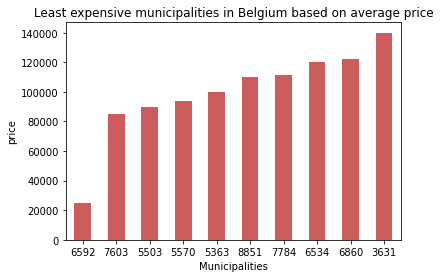

In [253]:
avg_price_be = df.groupby('Post_code_orig')['Price'].mean()

lep_average = avg_price_be.sort_values(ascending=True).head(10)

ax = lep_average.plot.bar(x='Price', y='Post_code_orig', rot=0, color=["IndianRed"])  
ax.set_title('Least expensive municipalities in Belgium based on average price')    
ax.set_xlabel('Municipalities')    
ax.set_ylabel('price')  
plt.xlabel('Municipalities')

#### Least expensive municipalities in Belgium based on median price

Text(0.5, 0, 'Municipalities')

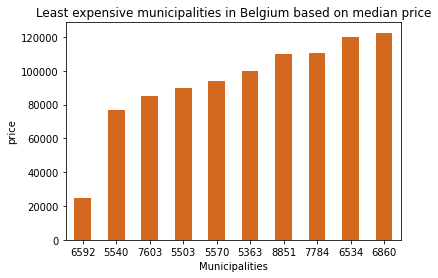

In [254]:
median_price_be = df.groupby('Post_code_orig')['Price'].median()

lep_median = median_price_be.sort_values(ascending=True).head(10)

ax = lep_median.plot.bar(x='Price', y='Post_code_orig', rot=0, color=["chocolate"])  
ax.set_title('Least expensive municipalities in Belgium based on median price')    
ax.set_xlabel('Municipalities')    
ax.set_ylabel('price')  
plt.xlabel('Municipalities')

#### Least expensive municipalities in Belgium based on price/m2

Text(0.5, 0, 'Municipalities')

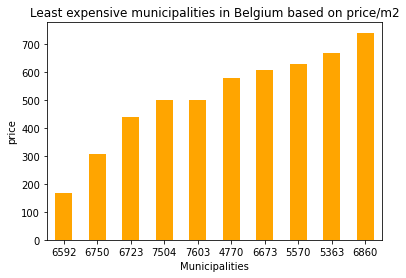

In [255]:
price_m2_be = df.groupby('Post_code_orig')['price/m2'].mean()

lep_price = price_m2_be.sort_values(ascending=True).head(10)

ax = lep_price.plot.bar(x='Price', y='Post_code_orig', rot=0, color=["orange"])  
ax.set_title('Least expensive municipalities in Belgium based on price/m2')    
ax.set_xlabel('Municipalities')    
ax.set_ylabel('price')  
plt.xlabel('Municipalities')

In [56]:
price_m2_be = df.groupby('Post_code_orig')['price/m2'].mean()

price_m2_be.sort_values(ascending=False).head(10)



Post_code_orig
8554    10366.666667
8300     9428.955939
5561     9000.000000
8301     7247.717667
4050     7219.445000
9772     6966.670000
3000     6079.703964
3660     6018.285000
3950     5996.895000
2030     5927.190000
Name: price/m2, dtype: float64

### Wallonia

#### Most expensive municipalities in Wallonia based on average price

In [67]:
df_g = df.query('region == "Wallonia"')

df_g = df_g.filter(['Post_code_orig', 'Price'])

avg_price_wal = df_g.groupby('Post_code_orig').mean()

avg_price_wal.sort_values(by=['Price'], ascending=False).head(10)

,Price
Post_code_orig,
5520,5.500000e+06
1404,3.200000e+06
7504,2.350000e+06
6662,1.599500e+06
1380,1.589976e+06
4770,1.500000e+06
7133,1.386667e+06
5561,1.350000e+06
1342,1.237250e+06


#### Most expensive municipalities in Wallonia based on median price

In [68]:
median_price_wal = df_g.groupby('Post_code_orig').median()

median_price_wal.sort_values(by=['Price'], ascending=False).head(10)

,Price
Post_code_orig,
5520,5500000.0
1404,3200000.0
7504,2350000.0
7133,1900000.0
6662,1599500.0
4770,1500000.0
1342,1500000.0
5561,1350000.0
5354,1195000.0


#### Most expensive municipalities in Wallonia based on price/m2

In [3]:
df_f = df.query('region == "Wallonia"')

df_f = df_f.filter(['Post_code_orig', 'price/m2'])

price_m2_wal = df_f.groupby('Post_code_orig').mean()

price_m2_wal.sort_values(by=['price/m2'], ascending=False).head(10)

plt.plot(df_f[], density = True, bins=500) 


SyntaxError: invalid syntax (853706434.py, line 9)

#### Least expensive municipalities in Wallonia based on average price

(array([4.82539734e-08, 2.17142880e-07, 9.65079468e-08, 1.20634934e-07,
        5.06666721e-07, 4.34285761e-07, 6.51428641e-07, 7.72063574e-07,
        1.37523824e-06, 9.40952481e-07, 1.47174619e-06, 2.05079387e-06,
        2.48507963e-06, 1.42349222e-06, 2.34031771e-06, 2.09904784e-06,
        2.36444470e-06, 2.41269867e-06, 2.55746059e-06, 2.31619072e-06,
        2.46095264e-06, 3.76380993e-06, 1.95428592e-06, 2.43682566e-06,
        2.99174635e-06, 3.49841307e-06, 7.96190561e-07, 1.39936523e-06,
        2.43682566e-06, 1.39936523e-06, 2.58158758e-06, 1.64063510e-06,
        1.54412715e-06, 1.13396837e-06, 2.24380976e-06, 5.79047681e-07,
        9.16825495e-07, 9.40952481e-07, 2.07492086e-06, 4.58412747e-07,
        3.61904801e-07, 1.01333344e-06, 1.64063510e-06, 4.10158774e-07,
        6.03174668e-07, 5.79047681e-07, 1.93015894e-07, 1.30285728e-06,
        3.13650827e-07, 6.03174668e-07, 4.34285761e-07, 1.44761920e-06,
        4.82539734e-08, 1.44761920e-07, 2.89523840e-07, 2.412698

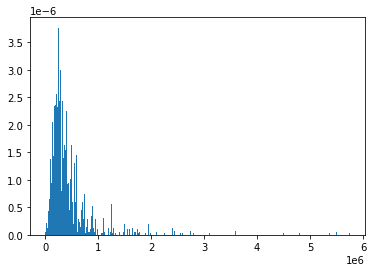

In [76]:
df_g = df.query('region == "Wallonia"')

df_g = df_g.filter(['Post_code_orig', 'Price'])

avg_price_wal = df_g.groupby('Post_code_orig').mean()

avg_price_wal.sort_values(by=['Price'], ascending=True).head(10)
plt.hist(df_g['Price'], density = True, bins=500) 

#### Least expensive municipalities in Wallonia based on median price

In [ ]:
median_price_wal = df_g.groupby('Post_code_orig').median()

median_price_wal.sort_values(by=['Price'], ascending=True).head(10)

,Price
Post_code_orig,
6592,25000.0
5540,77000.0
7603,85000.0
5503,90000.0
5570,94000.0
5363,100000.0
7784,110787.0
6534,120000.0
6860,122500.0


#### Least expensive municipalities in Wallonia based on price/m2

(array([4.74166955e-08, 6.03485216e-08, 1.07765217e-07, 2.45704695e-07,
        4.78477564e-07, 7.28492867e-07, 1.25869774e-06, 1.67682678e-06,
        1.57768278e-06, 1.82769808e-06, 1.83631930e-06, 2.19841043e-06,
        2.59067582e-06, 2.82344869e-06, 2.62516069e-06, 2.59067582e-06,
        1.45698573e-06, 1.88804660e-06, 1.91391026e-06, 1.56906156e-06,
        1.81476626e-06, 6.20727650e-07, 1.00437182e-06, 1.43543269e-06,
        8.79364171e-07, 5.56068520e-07, 1.01730365e-06, 6.29348868e-07,
        9.05227823e-07, 3.83644173e-07, 6.20727650e-07, 1.01730365e-06,
        4.31060868e-07, 4.05197216e-07, 6.59523129e-07, 3.83644173e-07,
        9.00917215e-07, 1.76734956e-07, 2.75878956e-07, 5.08651825e-07,
        2.28462260e-07, 4.82788173e-07, 2.11219825e-07, 1.16386434e-07,
        4.78477564e-07, 6.46591302e-08, 3.01742608e-07, 3.36227477e-07,
        6.89697389e-08, 3.66401738e-07, 4.31060868e-08, 2.41394086e-07,
        4.31060868e-07, 8.62121737e-09, 2.15530434e-08, 8.621217

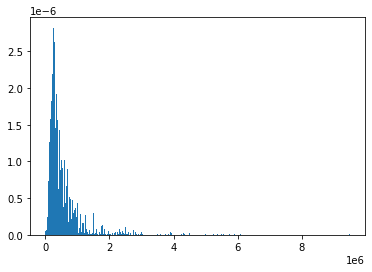

In [77]:
df_f = df.query('region == "Wallonia"')

df_f = df_f.filter(['Post_code_orig', 'price/m2'])

price_m2_wal = df_f.groupby('Post_code_orig').mean()

price_m2_wal.sort_values(by=['price/m2'], ascending=True).head(10)

plt.hist(x=df['Price'], density = True, bins=500) 

### Flanders

#### Most expensive municipalities in Flanders based on average price

In [ ]:
df_fl = df.query('region == "Flanders"')

df_fl = df_fl.filter(['Post_code_orig', 'Price'])

avg_price_fl = df_fl.groupby('Post_code_orig').mean()

avg_price_fl.sort_values(by=['Price'], ascending=False).head(10)

,Price
Post_code_orig,
8554,2.308333e+06
3080,1.872700e+06
2321,1.659667e+06
1640,1.606700e+06
9111,1.553333e+06
2360,1.492118e+06
3470,1.381875e+06
8300,1.379083e+06
3212,1.349500e+06


#### Most expensive municipalities in Flanders based on median price

In [62]:
median_price_fl = df_fl.groupby('Post_code_orig').median()

median_price_fl.sort_values(by=['Price'], ascending=False).head(10)

,Price
Post_code_orig,
8554,3300000.0
3080,1495000.0
1640,1472500.0
3212,1349500.0
2812,1200000.0
9830,1200000.0
2330,1174500.0
2950,1150000.0
8904,1099500.0


#### Most expensive municipalities in Flanders based on price/m2

In [63]:
df_fl_pm2 = df.query('region == "Flanders"')

df_fl_pm2 = df_fl_pm2.filter(['Post_code_orig', 'price/m2'])

price_m2_fl = df_fl_pm2.groupby('Post_code_orig').mean()

price_m2_fl.sort_values(by=['price/m2'], ascending=False).head(10)

,price/m2
Post_code_orig,
8554,10366.666667
8300,9428.955939
8301,7247.717667
9772,6966.670000
3000,6079.703964
3660,6018.285000
3950,5996.895000
2030,5927.190000
8904,5780.135000


#### Least expensive municipalities in Flanders based on average price

In [64]:
df_fl_le = df.query('region == "Flanders"')

df_fl_le = df_fl_le.filter(['Post_code_orig', 'Price'])

avg_price_fl = df_fl_le.groupby('Post_code_orig').mean()

avg_price_fl.sort_values(by=['Price'], ascending=True).head(10)

,Price
Post_code_orig,
8851,110000.000000
3631,140000.000000
9970,158000.000000
3051,175000.000000
8430,183973.529412
1670,186500.000000
2450,189000.000000
1654,195000.000000
9950,197500.000000


#### Least expensive municipalities in Flanders based on median price

In [65]:
median_price_fl = df_fl_le.groupby('Post_code_orig').median()

median_price_fl.sort_values(by=['Price'], ascending=True).head(10)

,Price
Post_code_orig,
8851,110000.0
3631,140000.0
8430,140000.0
9970,158000.0
3051,175000.0
8434,179000.0
1670,186500.0
2450,189000.0
8620,189000.0


#### Least expensive municipalities in Flanders based on price/m2

In [66]:
df_fl_le_pm2 = df.query('region == "Flanders"')

df_fl_le_pm2 = df_fl_le_pm2.filter(['Post_code_orig', 'price/m2'])

price_m2_fl = df_fl_le_pm2.groupby('Post_code_orig').mean()

price_m2_fl.sort_values(by=['price/m2'], ascending=True).head(10)

,price/m2
Post_code_orig,
8640,773.446667
8902,775.560000
3321,808.220000
3631,933.330000
8650,1023.970000
3791,1104.060000
9451,1111.110000
8851,1157.890000
8972,1195.000000


### Brussels

#### Most expensive municipalities in Brussels based on average price

In [67]:
df_bru = df.query('region == "Brussels"')

df_bru = df_bru.filter(['Post_code_orig', 'Price'])

avg_price_bru = df_bru.groupby('Post_code_orig').mean()

avg_price_bru.sort_values(by=['Price'], ascending=False).head(10)

,Price
Post_code_orig,
1180,1.152908e+06
1150,1.094220e+06
1050,9.272821e+05
1190,8.069917e+05
1040,7.469559e+05
1060,6.796486e+05
1000,6.626572e+05
1170,6.375000e+05
1160,5.546731e+05


#### Most expensive municipalities in Brussels based on median price

In [68]:
median_price_bru = df_bru.groupby('Post_code_orig').median()

median_price_bru.sort_values(by=['Price'], ascending=False).head(10)

,Price
Post_code_orig,
1180,845000.0
1150,784500.0
1040,547000.0
1050,537500.0
1060,500000.0
1170,482500.0
1160,449500.0
1000,427000.0
1190,415000.0


#### Most expensive municipalities in Brussels based on price/m2

In [69]:
df_bru_pm2 = df.query('region == "Brussels"')

df_bru_pm2 = df_bru_pm2.filter(['Post_code_orig', 'price/m2'])

price_m2_bru = df_bru_pm2.groupby('Post_code_orig').mean()

price_m2_bru.sort_values(by=['price/m2'], ascending=False).head(10)

,price/m2
Post_code_orig,
1180,5472.595397
1150,4997.690909
1040,4953.181324
1050,4894.764722
1160,4487.506154
1000,4303.502056
1060,4215.865000
1170,4110.742500
1200,4055.847250


#### Least expensive municipalities in Brussels based on average price

In [70]:
df_bru_le = df.query('region == "Brussels"')

df_bru_le = df_bru_le.filter(['Post_code_orig', 'Price'])

avg_price_bru = df_bru_le.groupby('Post_code_orig').mean()

avg_price_bru.sort_values(by=['Price'], ascending=True).head(10)

,Price
Post_code_orig,
1081,256309.523810
1140,275113.280702
1080,325897.443182
1130,355600.000000
1030,360543.627451
1090,361589.795918
1083,364416.944444
1120,377296.296296
1020,383661.764706


#### Least expensive municipalities in Brussels based on median price

In [71]:
median_price_bru = df_bru_le.groupby('Post_code_orig').median()

median_price_bru.sort_values(by=['Price'], ascending=True).head(10)

,Price
Post_code_orig,
1081,179000.0
1140,230000.0
1080,242000.0
1090,279500.0
1030,288950.0
1120,295000.0
1083,298777.5
1070,315000.0
1210,329000.0


#### Least expensive municipalities in Brussels based on price/m2

In [72]:
df_bru_le_pm2 = df.query('region == "Brussels"')

df_bru_le_pm2 = df_bru_le_pm2.filter(['Post_code_orig', 'price/m2'])

price_m2_bru = df_bru_le_pm2.groupby('Post_code_orig').mean()

price_m2_bru.sort_values(by=['price/m2'], ascending=True).head(10)

,price/m2
Post_code_orig,
1080,2452.043750
1020,2477.574118
1081,2612.088571
1130,2617.884000
1082,2624.932414
1090,2697.586122
1083,2856.315000
1030,2900.370882
1070,2924.017581


### Graphs

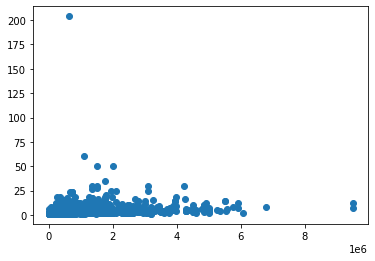

In [78]:
plt.scatter(x = 'Price', y = 'Bedrooms', data =df)

C:\Users\sayra\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='Bedrooms'>

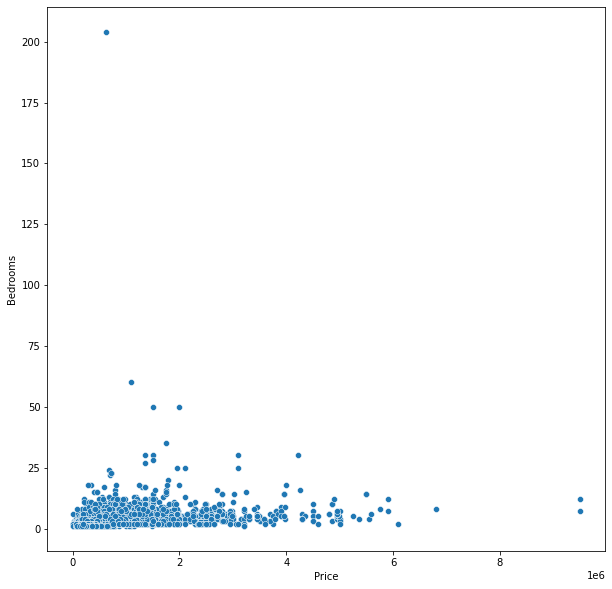

In [72]:
# check the relationship between number of bedrooms compare with the price
# type_of_property 0 : house , 1 : apartment
plt.subplots(figsize=(10, 10)) 
sns.scatterplot(df['Price'], df['Bedrooms'])  # hue=df['property sub-type']) 

						 Mean:  525273   Median:  345500   Mode: 295000.0


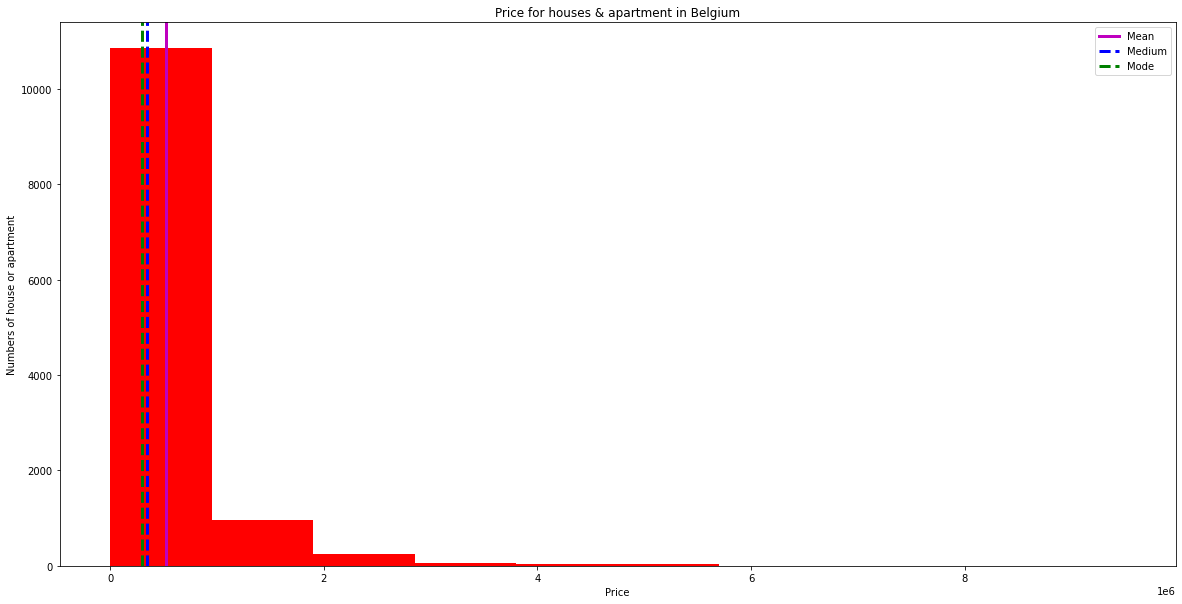

In [79]:
# closer look at the distribution by plotting a simple histogram with 10 bins.

plt.figure(figsize=(20,10));  # makes the plot wider
plt.hist(df['Price'], color='r');  # plots a simple histogram
plt.axvline(df['Price'].mean(), color='m', linewidth=3,label='Mean')  # draw a line for mean
plt.axvline(df['Price'].median(), color='b', linestyle='dashed', linewidth=3,label='Medium') # draw a line for median
plt.axvline(df['Price'].mode()[0], color='g', linestyle='dashed', linewidth=3,label='Mode') # draw a line for mode

plt.title('Price for houses & apartment in Belgium')
plt.xlabel('Price')    # label the x-axis
plt.ylabel('Numbers of house or apartment')    # label the y-axis
plt.legend()      # Plot the legend

mean=round(df['Price'].mean())
median=round(df['Price'].median())
mode=round(df['Price'].mode())

print('\t\t\t\t\t\t Mean: ',mean,'  Median: ',median,'  Mode:',mode[0])

In [80]:
# plot heatmap checking for correlation
# Properties of the whole dataset

fig,ax = plt.subplots(figsize=(14, 14))   
headmap_plot = sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")  


figure = headmap_plot.get_figure()    
figure.savefig('Heatmap.png', dpi=100)

(array([8.32735773e-06, 1.24910366e-05, 4.16367886e-05, 8.32735773e-06,
        4.99641464e-05, 7.91098984e-05, 9.16009350e-05, 1.12419329e-04,
        1.24910366e-04, 1.70710833e-04, 1.83201870e-04, 1.62383476e-04,
        2.08183943e-04, 2.99784878e-04, 2.53984411e-04, 2.49820732e-04,
        2.74802805e-04, 3.45585346e-04, 3.78894777e-04, 4.24695244e-04,
        3.83058455e-04, 4.66332033e-04, 4.66332033e-04, 4.58004675e-04,
        4.74659390e-04, 4.74659390e-04, 3.83058455e-04, 4.91314106e-04,
        4.28858923e-04, 4.78823069e-04, 4.62168354e-04, 3.74731098e-04,
        3.91385813e-04, 4.24695244e-04, 3.78894777e-04, 2.74802805e-04,
        2.91457520e-04, 3.87222134e-04, 2.83130163e-04, 3.37257988e-04,
        2.91457520e-04, 1.74874512e-04, 2.70639126e-04, 2.04020264e-04,
        1.83201870e-04, 1.66547155e-04, 1.33237724e-04, 1.45728760e-04,
        1.66547155e-04, 1.45728760e-04, 6.66188618e-05, 8.74372561e-05,
        9.16009350e-05, 4.58004675e-05, 1.16583008e-04, 6.245518

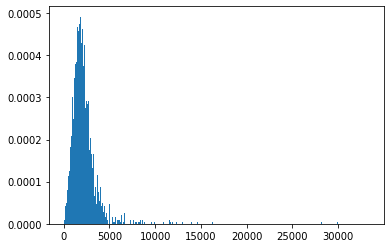

In [57]:
# Most expensive municipalities in Wallonia based on price/m2
df_f = df.query('region == "Wallonia"')

df_f = df_f.filter(['Post_code_orig', 'price/m2'])

price_m2_wal = df_f.groupby('Post_code_orig').mean()

price_m2_wal.sort_values(by=['price/m2'], ascending=False).head(10)

plt.hist(df_f['price/m2'], density = True, bins=500) 

(array([4.74166955e-08, 6.03485216e-08, 1.07765217e-07, 2.45704695e-07,
        4.78477564e-07, 7.28492867e-07, 1.25869774e-06, 1.67682678e-06,
        1.57768278e-06, 1.82769808e-06, 1.83631930e-06, 2.19841043e-06,
        2.59067582e-06, 2.82344869e-06, 2.62516069e-06, 2.59067582e-06,
        1.45698573e-06, 1.88804660e-06, 1.91391026e-06, 1.56906156e-06,
        1.81476626e-06, 6.20727650e-07, 1.00437182e-06, 1.43543269e-06,
        8.79364171e-07, 5.56068520e-07, 1.01730365e-06, 6.29348868e-07,
        9.05227823e-07, 3.83644173e-07, 6.20727650e-07, 1.01730365e-06,
        4.31060868e-07, 4.05197216e-07, 6.59523129e-07, 3.83644173e-07,
        9.00917215e-07, 1.76734956e-07, 2.75878956e-07, 5.08651825e-07,
        2.28462260e-07, 4.82788173e-07, 2.11219825e-07, 1.16386434e-07,
        4.78477564e-07, 6.46591302e-08, 3.01742608e-07, 3.36227477e-07,
        6.89697389e-08, 3.66401738e-07, 4.31060868e-08, 2.41394086e-07,
        4.31060868e-07, 8.62121737e-09, 2.15530434e-08, 8.621217

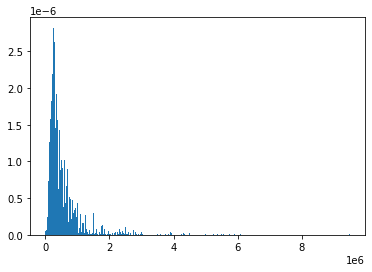

In [58]:
# Least expensive municipalities in Wallonia based on average price
df_f = df.query('region == "Wallonia"')

df_f = df_f.filter(['Post_code_orig', 'price/m2'])

price_m2_wal = df_f.groupby('Post_code_orig').mean()

price_m2_wal.sort_values(by=['price/m2'], ascending=True).head(10)

plt.hist(x=df['Price'], density = True, bins=500) 